# Explore here

In [130]:
# Your code here
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import *


In [131]:
df = pd.read_csv('/workspaces/pauline-Regularized-Linear.-Reg./data/raw/demographic_health_data.csv')
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

In [132]:
df.shape

(3140, 108)

In [133]:
#Miramos si hay nulos en alguas columnas:
nulos = df.isnull().sum()
nulos = nulos[nulos > 0]  #Filtrar solo las columnas que tienen nulos
print(nulos)



Series([], dtype: int64)


In [134]:
#Revisamos que no haya fila duplicada:
sum(df.duplicated())


0

In [135]:
#Miramos num de valores unicas por columna, ordenadas, para ver si hay columnas con 1 valor, o binarias por ejemplo, o columnas categoricas relevantes:
df.nunique().sort_values()

Urban_rural_code                                                                    6
Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)             30
Active General Surgeons per 100000 Population 2018 (AAMC)                          32
CKD_Lower 95% CI                                                                   39
CKD_prevalence                                                                     43
CKD_Upper 95% CI                                                                   46
Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)             49
Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)      50
Active Primary Care Physicians per 100000 Population 2018 (AAMC)                   50
Active Physicians per 100000 Population 2018 (AAMC)                                51
STATE_FIPS                                                                         51
STATE_NAME                                            

In [136]:
#Miramos tipos de datos : 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [137]:
#Quiero ver que son las columnas object, las 2 columnas categoricas: 
print(df.select_dtypes(include=['object']))

                COUNTY_NAME            STATE_NAME
0                   Autauga               Alabama
1                   Baldwin               Alabama
2                   Barbour               Alabama
3                      Bibb               Alabama
4                    Blount               Alabama
5                   Bullock               Alabama
6                    Butler               Alabama
7                   Calhoun               Alabama
8                  Chambers               Alabama
9                  Cherokee               Alabama
10                  Chilton               Alabama
11                  Choctaw               Alabama
12                   Clarke               Alabama
13                     Clay               Alabama
14                 Cleburne               Alabama
15                   Coffee               Alabama
16                  Colbert               Alabama
17                  Conecuh               Alabama
18                    Coosa               Alabama


In [138]:
#Y las voy a transformar a numericas para que todo el dataset sea asi : 
col_cat = ['COUNTY_NAME', 'STATE_NAME']
enc = LabelEncoder()

# Aplicamos label encoder a las columnas de manera independiente
df[col_cat] = df[col_cat].apply(enc.fit_transform)

print(df[col_cat].head())


   COUNTY_NAME  STATE_NAME
0           80           0
1           87           0
2           98           0
3          148           0
4          163           0


In [139]:
#Descripción básica:
pd.set_option('display.max_columns', None) #Primero : ajustar la config para mostrar todas las columnas, sino no podia vizualizar todas las columnas
df.describe().T.round(1) 


,count,mean,std,min,25%,50%,75%,max
fips,3140.0,30401.6,15150.6,1001.0,18180.5,29178.0,45081.5,56045.0
TOT_POP,3140.0,104189.4,333583.4,88.0,10963.2,25800.5,67913.0,10105518.0
0-9,3140.0,12740.3,41807.3,0.0,1280.5,3057.0,8097.0,1208253.0
0-9 y/o % of total pop,3140.0,11.9,2.1,0.0,10.6,11.8,13.0,25.5
19-Oct,3140.0,13368.0,42284.4,0.0,1374.5,3274.0,8822.2,1239139.0
10-19 y/o % of total pop,3140.0,12.7,1.8,0.0,11.7,12.7,13.7,23.3
20-29,3140.0,14469.3,49577.7,0.0,1263.8,3108.0,8976.2,1557073.0
20-29 y/o % of total pop,3140.0,12.3,3.1,0.0,10.5,11.8,13.2,37.6
30-39,3140.0,13916.5,48991.0,11.0,1232.8,3000.5,8314.2,1501844.0
30-39 y/o % of total pop,3140.0,11.8,1.7,6.1,10.7,11.6,12.6,22.2


Tenemos que seleccionar una  **variable objetivo (relacionada con la salud)**para llevar a cabo el análisis.

- Veo que hay variables tipo : nombre de enfermedad_number o nombre de enfermedad_prevalence

**Prevalence** = En épidémiologie = nombre de cas enregistrés pour une maladie donnée sur une population déterminée. 
Elle est généralement exprimée en pourcentage.

Entonces, es más relevante elegir como objectivo una variable prevalencia, que es un %, que valor absoluto. 

**Vamos a filtrar columnas que tienen prevalence en su nombre para ver que posibilidad tenemos y despues elegimos una variable objectivo dentro de la lista** :


In [140]:
#Columnas con "prevalence":
prevalence_columns = [col for col in df.columns if 'prevalence' in col.lower()]
print(prevalence_columns)

['anycondition_prevalence', 'Obesity_prevalence', 'Heart disease_prevalence', 'COPD_prevalence', 'diabetes_prevalence', 'CKD_prevalence']


Any condition hubiera podido ser muy relevantes si es un % de todas las enfermedades juntas, analizadas ahi, pero no estoy muy segura del significado de esa columna. 
Entonces vamos a elegir como variable objectivo "Obesity_prevalence" porque :

- Obesidad factor inicial de riesgo importante para muchas otras enfermedades presentes aquí: cardiaco, pulmonar, diabetes ...
- Es relacionado al estilo/condicion de vida, pues factores sociodemograficos presentes aquí

In [141]:
#Definimos entonces y separamos nuestra y 
 
X = df.drop(columns='Obesity_prevalence', axis=1)
y = df['Obesity_prevalence']

#Formamos los conjuntos de entrenamiento y de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [142]:
#Estandarizamos : 
scaler = StandardScaler() #porque deja con una media de 0 y no hay binarias en nuestra df
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Regresión lineal sin regularizar

In [143]:
m_lineal = LinearRegression().fit(X_train_scaled, y_train)
yhat_train = m_lineal.predict(X_train_scaled) #(yhat = estimacion)
yhat_test = m_lineal.predict(X_test_scaled)

In [144]:
#Hacemos diferencia entre resultados de r2, median Absolute Error y MAPE de train y test : 

def get_metrics(yhat, y_test, yhat_train, y_train):
  metrics_train = r2_score(y_train, yhat_train), median_absolute_error(y_train, yhat_train), mean_absolute_percentage_error(y_train, yhat_train)*100
  metrics_test = r2_score(y_test, yhat), median_absolute_error(y_test, yhat), mean_absolute_percentage_error(y_test, yhat)*100
  metrics_diff = list(map(lambda x: x[1]-x[0], zip(metrics_train, metrics_test))) #zip para hacer pares
  return pd.DataFrame(data=[metrics_train, metrics_test, metrics_diff], columns=['R2', 'Median AE', 'MAPE'], index=['Train set', 'Test set', 'Diferencia'])

In [145]:
get_metrics(yhat_test, y_test, yhat_train, y_train)

,R2,Median AE,MAPE
Train set,0.999849,0.032533,0.129021
Test set,0.999862,0.032578,0.127077
Diferencia,0.000013,0.000044,-0.001944


Conclusion:
- **R2**: Tanto train como test tiene resultado muy cerca a 1, y muy poca diferencia entre los 2 = modelo tiene un muy buen ajuste
- **Median AE**: = la mediana de los errores absolutos entre las predicciones y los valores reales ---> casi no hay diferencia pues sugiere que el modelo ta haciendo predicciones precisas. 
- **MAPE (Error porcentual absoluto medio)** : error absoluto medio en términos porcentuales. --> igual, está muy baja en ambos casos y casi no hay diferencia. El modelo tiene un buen rendimiento y un error porcentual bajo


In [146]:
m_lineal.coef_.shape

(107,)

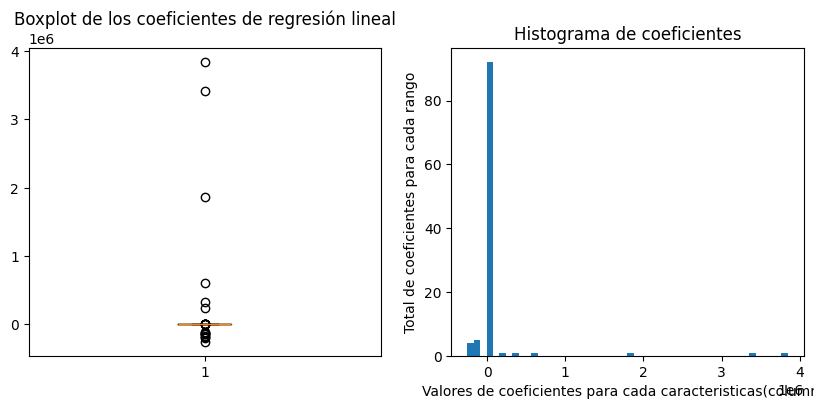

In [156]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_lineal.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal')
plt.subplot(1, 2, 2)
plt.hist(m_lineal.coef_,50)
plt.xlabel('Valores de coeficientes para cada caracteristicas(columna)')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes')
plt.show()

Esto muestra que unos 100 coef de 107 están a 0. 

Como hay muchas caracteristicas el modelo está haciendo un sobreajuste (=asignar un valor cercano a 0 a muchos coef).
Habria entonces que quitar caracteristicas, pero no es posible elegir cuales nos guardamos o borramos, solo gracias al EDA (debe haber mucho multicolinealidad o no estoy segura a que corresponde cada columna). 
Entonces vamos a aplicar regularizaciones para poner una penalización en los coeficientes, lo que ayudara a evitar sobreajuste y a mejorar la generalización del modelo.

1 - Lasso = **es una forma de seleccionar caracteristicas** 
nos va a cancelar caractaristicas, utíl cuando creemos que hay variables que no van a contribuir a la predicción


In [149]:
m_lasso = LassoCV(alphas=np.logspace(-6, 6, 10), cv=5, random_state=42, n_jobs=-1).fit(X_train_scaled, y_train)
yhat_train_lasso = m_lasso.predict(X_train_scaled)
yhat_lasso = m_lasso.predict(X_test_scaled)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.603e+00, tolerance: 5.057e+00
  model = cd_fast.enet_coordinate_descent(


In [150]:
np.logspace(-6, 6, 10)

array([1.00000000e-06, 2.15443469e-05, 4.64158883e-04, 1.00000000e-02,
       2.15443469e-01, 4.64158883e+00, 1.00000000e+02, 2.15443469e+03,
       4.64158883e+04, 1.00000000e+06])

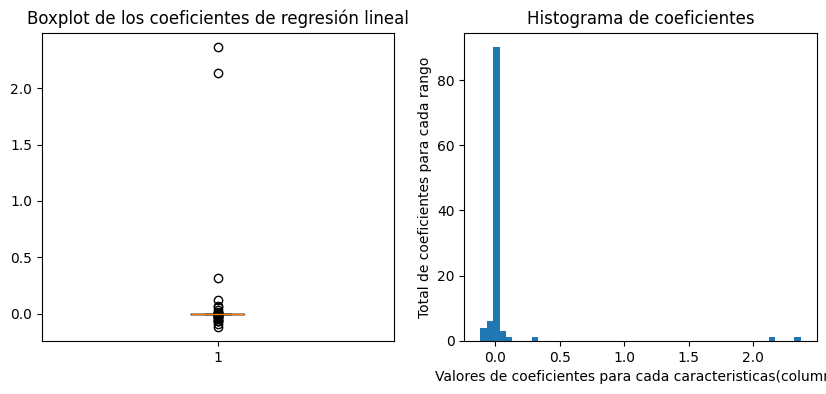

In [162]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_lasso.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal')
plt.subplot(1, 2, 2)
plt.hist(m_lasso.coef_,50)
plt.xlabel('Valores de coeficientes para cada caracteristicas(columna)')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes')
plt.show()

In [154]:
m_lasso.coef_

array([-1.13872610e-03,  1.24363619e-01,  3.45388900e-02, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.90668357e-03, -0.00000000e+00, -1.90219137e-03,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  8.04716684e-05,
       -2.89715569e-02,  0.00000000e+00, -6.59825866e-02,  0.00000000e+00,
       -9.39542767e-02,  0.00000000e+00, -4.82241236e-02, -6.28905317e-04,
       -6.18508214e-03,  0.00000000e+00, -1.39126398e-02, -0.00000000e+00,
       -5.40977770e-04,  0.00000000e+00, -3.14917690e-03, -3.64348074e-03,
       -9.23128554e-04, -5.65578906e-03,  6.63995567e-04,  0.00000000e+00,
       -1.78660459e-03,  0.00000000e+00, -2.98737034e-03,  4.58966435e-04,
        0.00000000e+00, -6.85754028e-02, -0.00000000e+00, -2.18326447e-02,
       -3.95526924e-03, -1.10994179e-03,  1.98477845e-04,  6.60452695e-04,
       -0.00000000e+00, -3.21549701e-02,  0.00000000e+00, -5.71004582e-03,
       -0.00000000e+00, -

In [157]:
#Vamos a ver cuantas variables elimina lasso :
print(f'El porcentaje de variables canceladas es: {round(len(m_lasso.coef_[np.abs(m_lasso.coef_)==0])/len(m_lasso.coef_)*100,2)}%')
print(f'El modelo utiliza {len(m_lasso.coef_[np.abs(m_lasso.coef_)>0])} variables.')

El porcentaje de variables canceladas es: 50.47%
El modelo utiliza 53 variables.


In [158]:
get_metrics(yhat_lasso, y_test, yhat_train_lasso, y_train)

,R2,Median AE,MAPE
Train set,0.999835,0.033309,0.134217
Test set,0.999860,0.030205,0.127206
Diferencia,0.000025,-0.003104,-0.007010


2 - Ridge 

In [159]:
m_ridge = RidgeCV(alphas=np.logspace(-6, 6, 10), cv=5).fit(X_train_scaled, y_train)

# Realizamos predicciones sobre el conjunto de entrenamiento y de testeo
yhat_train_ridge = m_ridge.predict(X_train_scaled)
yhat_ridge = m_ridge.predict(X_test_scaled)

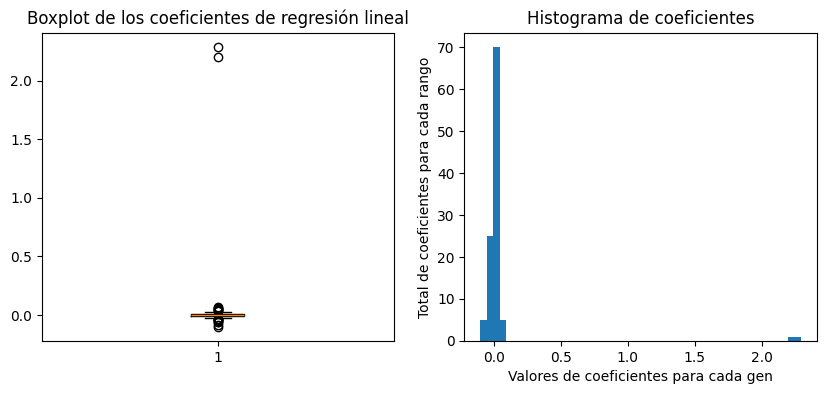

In [160]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_ridge.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal')
plt.subplot(1, 2, 2)
plt.hist(m_ridge.coef_,50)
plt.xlabel('Valores de coeficientes para cada caracteristicas(columna)')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes')
plt.show()

In [163]:
print(f'El porcentaje de variables canceladas es: {round(len(m_ridge.coef_[np.abs(m_ridge.coef_)==0])/len(m_ridge.coef_)*100,2)}%')
print(f'El modelo utiliza {len(m_ridge.coef_[np.abs(m_ridge.coef_)>0])} variables.')

El porcentaje de variables canceladas es: 0.0%
El modelo utiliza 107 variables.


Ridge no cancela nada, se usan todas aunque algunas están muy cerca de 0.

In [164]:
get_metrics(yhat_ridge, y_test, yhat_train_ridge, y_train)

,R2,Median AE,MAPE
Train set,0.999849,0.032484,0.129255
Test set,0.999862,0.031687,0.126924
Diferencia,0.000013,-0.000797,-0.002331


Conclusion :

In [166]:
print(get_metrics(yhat_test, y_test, yhat_train, y_train))
print(get_metrics(yhat_lasso, y_test, yhat_train_lasso, y_train))
print(get_metrics(yhat_ridge, y_test, yhat_train_ridge, y_train))

                  R2  Median AE      MAPE
Train set   0.999849   0.032533  0.129021
Test set    0.999862   0.032578  0.127077
Diferencia  0.000013   0.000044 -0.001944
                  R2  Median AE      MAPE
Train set   0.999835   0.033309  0.134217
Test set    0.999860   0.030205  0.127206
Diferencia  0.000025  -0.003104 -0.007010
                  R2  Median AE      MAPE
Train set   0.999849   0.032484  0.129255
Test set    0.999862   0.031687  0.126924
Diferencia  0.000013  -0.000797 -0.002331


- Si comparamos los 3 modelos, vemos conclusiones muy similares :  valores de R² casi idénticos, y diferencias en Median AE y MAPE son mínimas, tanto en traon como test. 
- La regularización no está proporcionando una mejora significativa.

- Esto sugiere que el modelo sin regularización ya estaba funcionando muy bien? Y que realmente unas 100 variables no tienen relación significativa en con la Y? 
Que habría que hacer, cambiar de Y? o he faltado algo?